#  Ordinary Differential Equations Algorithms

### Packages and Configurations 

In [25]:
include("DiffSolving.jl")
using Plots, LaTeXStrings
cd(dirname(@__FILE__))

## First Order ODE

### RC Circuit

##### *Comparison Between Euler Method and Numerical Solution*

In [10]:
rc=1.0; tₘᵢₙ=0.0; tₘₐₓ=5.0; h=0.01; q₀=1.0
t_range, Q=DiffSolving.EulerMethod((t,x)->(q₀ .- x )/rc, [0.0], tₘᵢₙ, tₘₐₓ, h)
plot(t_range, Q,label="Euler Method",ylabel=L"Q(t)",xlabel="t(s)",title=L"\Delta t=0.01s", dpi=400, color=:orchid4, linewidth=3)
plot!(t -> q₀ *(1 - exp(-t/rc)), label="Numerical Solution", linewidth=3, color=:pink1, linestyle=:dash, legend=:bottomright)
savefig("../../computational_physics/PSet9/Figs/Euler_compare.pdf")

##### *Error Plot*

In [25]:
step_list=collect(range(0.01, 1, length=100))
Error_list=[]
for h in step_list
    t_range, Q=DiffSolving.EulerMethod((t,x)->(q₀ .- x )/rc, xᵢₙᵢₜ, tₘᵢₙ, tₘₐₓ, h)
    push!(Error_list, abs(sum(Q .- q₀ .*(1 .- exp.(-t_range ./rc)))))
end
plot(step_list, Error_list, ylabel=L"Error", xlabel=L"Step\ Size",
     title=L"Error\ of\ the\ Euler\ Method's\ Solution\ for\ different\ Steps",lw=2, color=:darkorange,dpi=400, legend=false)
savefig("../../computational_physics/PSet9/Figs/Euler_Error.pdf")


##### *Instability for the Given Algorithm*

In [63]:
t_range, Q=DiffSolving.InstableAlgorithm((t,x)->(q₀ .- x )/rc, xᵢₙᵢₜ, tₘᵢₙ, tₘₐₓ, 0.08)
plot(t_range, Q, color=:darkgoldenrod2, dpi=400, label="Instable Solution", xlabel=L"t/RC", ylabel=L"Q(t)")
plot!(t -> q₀ *(1 - exp(-t/rc)), label="Numerical Solution", linewidth=2, color=:brown4, linestyle=:dash, legend=:bottomright)
savefig("../../computational_physics/PSet9/Figs/Instability.pdf")

## Second Order ODE

### Simple Harmonic Oscillator 

##### *Place - Time Plot*

In [51]:
xᵢₙᵢₜ , vᵢₙᵢₜ= 1.0, 0.0; step=0.1;  n=5; tₘᵢₙ=0.0; tₘₐₓ=6.0; h=0.5
x_plot = plot(cos, tₘᵢₙ, tₘₐₓ, color=:cadetblue4, label=L"x(t)=x_0 cos(\omega t)")
v_plot = plot(t -> -sin(t), tₘᵢₙ, tₘₐₓ, color=:hotpink3, label=L"v(t)=\omega x_0 sin(\omega t")
t_E, x_E= DiffSolving.EulerMethod((t,x)-> [x[2], -x[1]], [1.0, 0.0], tₘᵢₙ, tₘₐₓ, h)
xPlot=plot!(x_plot,t_E ,x_E[: ,1], label="Euler", ls=:dot, marker=:circle, ylabel=L"x/x_0")
vPlot=plot!(v_plot,t_E, x_E[: ,2], label="Euler", ls=:dot, marker=:circle, ylabel=L"v/\omega x_0")
plot!(xPlot, vPlot, layout=(1,2), dpi=400, title="step=0.5", xlabel=L"\Delta t/\omega", legend=:topleft)
savefig("../../computational_physics/PSet9/Figs/SHM_Euler_comparison.pdf")


In [33]:
xᵢₙᵢₜ , vᵢₙᵢₜ= 1.0, 0.0; step=0.1;  n=5; tₘᵢₙ=0.0; tₘₐₓ=round(2π * n); h=0.5
t_EC, x_EC, v_EC = DiffSolving.EulerCromer((t,x)-> -x, 0.0, 1.0, tₘᵢₙ, tₘₐₓ, h)
t_V, x_V, v_V = DiffSolving.Verlet((t,x)-> -x, 0.0, 1.0, tₘᵢₙ, tₘₐₓ, h)

([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5  …  26.5, 27.0, 27.5, 28.0, 28.5, 29.0, 29.5, 30.0, 30.5, 31.0], [0.0, 0.5, 0.875, 1.03125, 0.9296875, 0.595703125, 0.11279296875, -0.3983154296875, -0.809844970703125, -1.0189132690429688  …  1.0294452053946823, 0.8605233801544201, 0.47647070987555284, -0.026699637872202614, -0.5231950761519074, -0.8888917453936354, -1.0323654782869545, -0.917747841608535, -0.5736932445279816, -0.08621533631543293], [1.0, 0.0, 0.75, 0.3125, -0.203125, -0.66796875, -0.9658203125, -1.022216796875, -0.82305908203125, -0.4181365966796875  …  0.17687895221681682, -0.33784365048052445, -0.7681053405577345, -1.006340695495511, -0.9929908765594095, -0.7313933384834559, -0.2869474657866382, 0.22923527335683902, 0.6881091941611066, 0.9749558164250974])

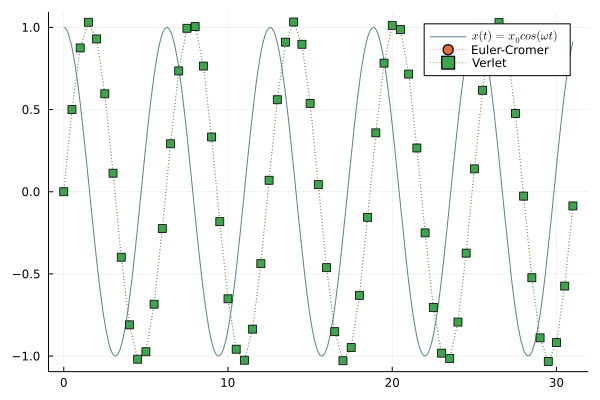

In [34]:
plot(cos, tₘᵢₙ, tₘₐₓ, color=:cadetblue4, label=L"x(t)=x_0 cos(\omega t)")
plot!(t_EC, x_EC, label="Euler-Cromer", ls=:dot, marker=:circle)
plot!(t_V, x_V, label="Verlet", ls=:dot, marker=:square)

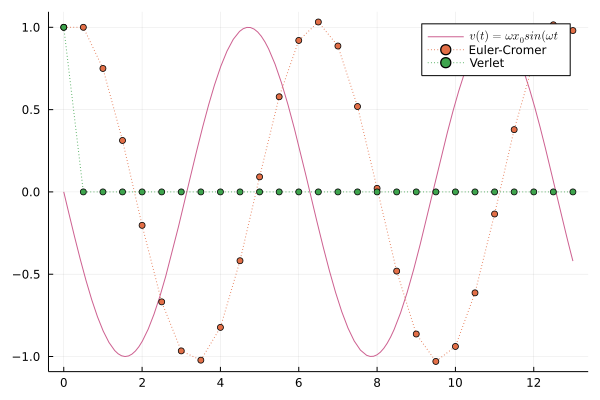

In [19]:
plot(t -> -sin(t), tₘᵢₙ, tₘₐₓ, color=:hotpink3, label=L"v(t)=\omega x_0 sin(\omega t")
plot!(t_EC, v_EC, label="Euler-Cromer", ls=:dot, marker=:circle)
plot!(t_V, v_V, label="Verlet", ls=:dot, marker=:circle)

In [ ]:
t_EC, x_EC, v_EC = DiffSolving.EulerCromer((t,x)-> -x, 0.0, 1.0, tₘᵢₙ, tₘₐₓ, h)
t_V, x_V, v_V = DiffSolving.Verlet((t,x)-> -x, 0.0, 1.0, tₘᵢₙ, tₘₐₓ, h)
t_VV, x_VV , v_VV= DiffSolving.VelocityVerlet((t,x)-> -x, 0.0, 1.0, tₘᵢₙ, tₘₐₓ, h)